In [30]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

#Read in all book reviews

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

books = ["Andy-Weir-The-Martian.csv", "Donna-Tartt-The-Goldfinch.csv", 
         "EL-James-Fifty-Shades-of-Grey.csv", "Fillian_Flynn-Gone_Girl.csv", 
         "John-Green-The-Fault-in-our-Stars.csv", "Laura-Hillenbrand-Unbroken.csv", 
         "Paula_Hawkins-The-Girl-On-The-Train.csv", "Suzanne-Collins-The-Hunger-Games.csv"]        

In [6]:
#Separate each book review into different classes - pos, neutral, neg [neutral class not dealt with this during this round]

neg = []
neutral = []
pos = []

for i in books:  
    for line in open(i):
        if int(line[0]) == 1 or int(line[0]) == 2:
            neg.append(line)
        elif int(line[0]) == 3:
            neutral.append(line)
        else:
            pos.append(line) 

In [7]:
ratings = []

for i in books:  
    for line in open(i):
        ratings.append(int(line[0]))

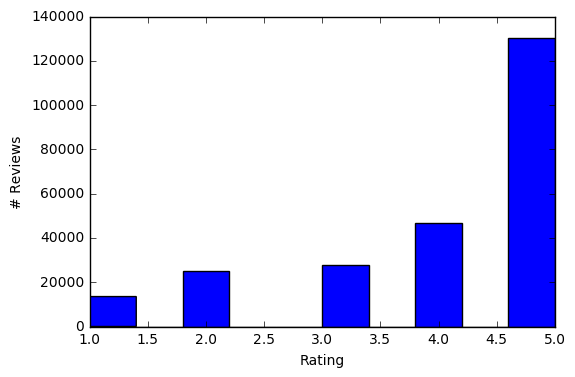

In [8]:
plt.hist(ratings)
plt.xlabel("Rating")
plt.ylabel("# Reviews")
plt.show()

In [ ]:
#Based on distribution of ratings, people tend to review books when they like the book.
#Thus for our training, there will be a huge amount of representatives for 5.0 rating, but not so much for ratings
#that range from 1.0 - 4.0. However, given the size of our dataset, this might not be a huge problem. 5.0 reviews
#are relatively more popular. 

In [9]:
rev1 = pd.read_csv("Andy-Weir-The-Martian.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev2 = pd.read_csv("Donna-Tartt-The-Goldfinch.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev3 = pd.read_csv("EL-James-Fifty-Shades-of-Grey.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev4 = pd.read_csv("Fillian_Flynn-Gone_Girl.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev5 = pd.read_csv("John-Green-The-Fault-in-our-Stars.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev6 = pd.read_csv("Laura-Hillenbrand-Unbroken.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev7 = pd.read_csv("Paula_Hawkins-The-Girl-On-The-Train.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev8 = pd.read_csv("Suzanne-Collins-The-Hunger-Games.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev7

,Review Score,Tail of Review URL,Review Title,Review Text
0,5.0,/gp/customer-reviews/R2QL7LO8IQZ7V2?ASIN=15946...,Best Hitchcock style mystery of voyeuristic ob...,"<span class=""a-size-base review-text"">Rachel i..."
1,2.0,/gp/customer-reviews/R1UP4LQV7KT04M?ASIN=15946...,ALCOHOLIC AMNESIA,"<span class=""a-size-base review-text"">THE GIRL..."
2,5.0,/gp/customer-reviews/R2UWX7IZYY45DQ?ASIN=15946...,The Gillian Flynn comparisons are utterly accu...,"<span class=""a-size-base review-text"">This was..."
3,4.0,/gp/customer-reviews/R376RH2ZC94RRY?ASIN=15946...,This is a Must Read.,"<span class=""a-size-base review-text"">Edgy, he..."
4,2.0,/gp/customer-reviews/R4R7KVVCO9YT5?ASIN=159463...,It gets thin and annoying by the end,"<span class=""a-size-base review-text"">After re..."
5,5.0,/gp/customer-reviews/R1KNVNNRT10F27?ASIN=15946...,Character development with the insight and und...,"<span class=""a-size-base review-text"">This boo..."
6,1.0,/gp/customer-reviews/R14GTLTTV9OZG1?ASIN=15946...,Don't Go There!,"<span class=""a-size-base review-text"">I absolu..."
7,1.0,/gp/customer-reviews/R23PY8QD5W6Y39?ASIN=15946...,"Not ""likeable""?!","<span class=""a-size-base review-text"">I am fas..."
8,1.0,/gp/customer-reviews/R1OL3GR25233BG?ASIN=15946...,Waste of time,"<span class=""a-size-base review-text"">I though..."
9,5.0,/gp/customer-reviews/R3RPKT95ZLM5WG?ASIN=15946...,No Reading Pleasure,"<span class=""a-size-base review-text"">With all..."


In [20]:
###Implementin with rev7 first then scaling up with other 7 df's

rev7['Review Text'] = rev7['Review Text'].map(lambda x: x.lstrip('<span class="a-size-base review-text">').rstrip('</span>'))
rev7['Review Text'] = rev7['Review Text'].map(lambda x: x.replace('<br/><br/>', ' '))
rev7['Review Text'] = rev7['Review Text'].map(lambda x: x.replace('<br/>', ' '))
rev7['Review Text'] = rev7['Review Text'].map(lambda x: x.replace('\ ', '')) #Why does this not work?!
rev7['Review Text'][600] #check to see if review is cleared of HTML. 

"I was searching for a new book, this was recommended for me everywhere so I read the sample and wasn't pleased. Kept looking &amp; kept getting this recommended again based in what I liked and had already read... so I thought it must get better. NO. 86% the way through the book (e reader) it FINALLY got KIND OF interesting. But never good! I am so disappointed with the raving reviews and reccomendations. It was a waste."

In [28]:
#Getting doc into vector and getting word/freq counts
from sklearn.feature_extraction.text import CountVectorizer


def make_xy(rev7, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(rev7['Review Text'])
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (rev7['Review Score']).values.astype(np.int)
    return X, y
X, y = make_xy(rev7)

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain,ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtrain, ytrain))
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 53.43%
MN Accuracy: 43.03%


/Users/mindyng/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# The poor performance here may be based on rev7 dataset having heavily skewed amount of feature 
# data for 5.0 rating. Hence, there would be less representatives for other ratings. So if new test
# data does not good training data to work off of then the test accuracy would be low too. 
# At least there is similar performance between training and test data. 

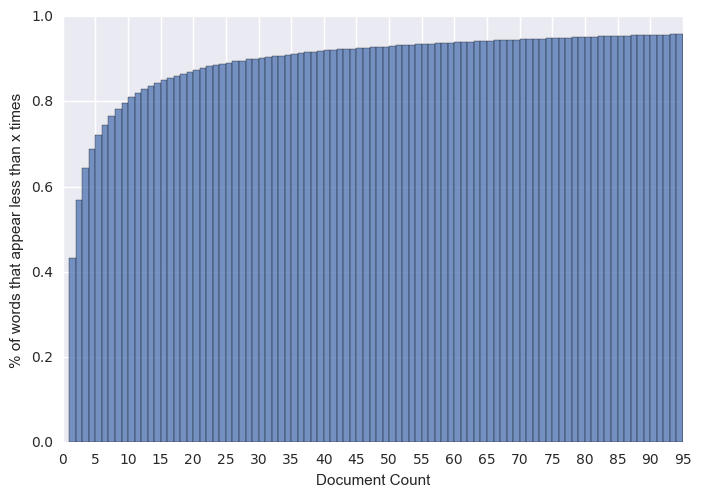

In [31]:
from collections import Counter
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(rev7['Review Text'])
document_count = Counter(X.tocsr().indices).values()

plt.figure()
plt.hist(document_count, bins = range(1000), alpha = 0.75, cumulative = True, normed = 1)
plt.axis([0,11,0,1])
plt.xticks(range(0,100,5))

plt.xlabel("Document Count")
plt.ylabel("% of words that appear less than x times")
plt.show()

In [ ]:
# @ approximately 2 documents the curve begins to curve steeply. This is a good place to set min_df. 
# @ approximately 20 documents the curve begins to plateau. This is a good place to set max_df.

In [32]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [59]:
def log_likelihood(clf, x, y): 
    prob = clf.predict_log_proba(x)
    negative = ((y == 1) - (y == 2)).all()
    neutral = y == 3
    positive = ((y == 4) - (y == 5)).all()
    return prob[negative, 1].sum() + prob[negative, 2].sum() + prob[neutral, 3].sum() + prob[positive, 4].sum() + prob[positive, 5].sum()

In [60]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(rev7.shape[0]), train_size=0.7)
mask = np.zeros(rev7.shape[0], dtype=np.bool)
mask[itest] = True

In [62]:
from sklearn.naive_bayes import MultinomialNB

#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
best_min_df = 2  #YOUR TURN: put your value of min_df here.


#Find the best value for alpha and min_df, and the best classifier
best_alpha = 1 #Need to run this in order to plug in value here and in subsequent code. Guessing 1 for now.
maxscore=-np.inf
for alpha in alphas:        
    vectorizer = CountVectorizer(min_df=best_min_df)       
    Xthis, ythis = make_xy(rev7, vectorizer)
    Xtrainthis = Xthis[mask]
    ytrainthis = ythis[mask]
    # your turn
    clf = MultinomialNB(alpha=alpha)
    print(alpha, cv_score(clf, Xtrainthis, ytrainthis, log_likelihood))

/Users/mindyng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  app.launch_new_instance()
/Users/mindyng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


IndexError: in the future, 0-d boolean arrays will be interpreted as a valid boolean index

In [63]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(rev7, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.544606
Accuracy on test data:     0.433858


In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, clf.predict(xtest)))

[[    4    53    14    94   988]
 [   11   148    33   316  3537]
 [    6   100    24   234  2594]
 [   11   157    50   375  5381]
 [   20   320    67   732 10728]]


In [65]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Good words\t     P(rating | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(rating | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(rating | word)
('              events', '0.99')
('              action', '0.99')
('               tired', '0.99')
('            suspense', '0.99')
('            changing', '0.99')
('       disappointing', '0.99')
('                 dow', '0.99')
('                till', '0.99')
('                 til', '0.99')
('                held', '0.99')
Bad words	     P(rating | word)
('             crucial', '0.71')
('              idiots', '0.71')
('                 apt', '0.71')
('         highlighted', '0.71')
('   indistinguishable', '0.70')
('              golden', '0.70')
('               abdic', '0.69')
('                  dr', '0.69')
('                 ann', '0.66')
('           providing', '0.65')


In [ ]:
#Bad words on the high prob end because the training set does not have a good set of bad reviews to allow for strong 
#predictability for test set.

In [67]:
import collections
import nltk.metrics
from nltk.classify import NaiveBayesClassifier


print 'train precision:', nltk.metrics.precision(xtrain, ytrain)
print 'train recall:', nltk.metrics.recall(xtrain, ytrain)
print 'train F-measure:', nltk.metrics.f_measure(xtrain, ytrain)
print 'test precision:', nltk.metrics.precision(xtest, ytest)
print 'test recall:', nltk.metrics.recall(xtest, ytest)
print 'test F-measure:', nltk.metrics.f_measure(xtest, ytest)

 train precision:

AttributeError: 'module' object has no attribute 'precision'